In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import numpy as np
from matplotlib import pyplot as plt
from keras.utils import np_utils
import cv2
import os

from keras import backend as K
K.set_image_dim_ordering('th')

%matplotlib inline

seed = 7
np.random.seed(seed)

Using TensorFlow backend.


In [2]:
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    x_train = x_train.reshape(x_train.shape[0], 1, 28, 28).astype('float32')

    x_test = x_test.reshape(x_test.shape[0], 1, 28, 28).astype('float32')

    x_train = x_train / 255
    x_test = x_test / 255

    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    
    return x_train, y_train, x_test, y_test

In [3]:
x_train, y_train, x_test, y_test = load_data()
num_classes = y_test.shape[1]
# O model será exportado para este arquivo
filename='mnistneuralnet.h5'

In [4]:
def model():
    model = Sequential()

    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(15, (3, 3), input_shape=(1, 28, 28), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.2))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))

    model.add(Dense(64, activation='relu'))

    model.add(Dense(32, activation='relu'))

    model.add(Dense(num_classes, activation='softmax', name='predict'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [5]:
model = model()
model.summary()
# Verifica se já existe um modelo treinado e exportado para um arquivo .h5.
# Um novo modelo será treinado, caso este arquivo não exista.
if not os.path.exists('./{}'.format(filename) ):
    model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200)
    model.save_weights(filename)
else:
    # carrega um modelo previamente treinado
    model.load_weights('./{}'.format(filename) )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 24, 24)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 12, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 10, 10)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 5, 5)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 5, 5)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               48128     
__________

In [6]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("\nacc: %.2f%%" % (scores[1]*100))


acc: 99.03%


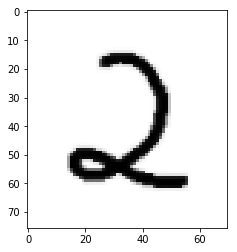

In [19]:
img_pred = cv2.imread("number-two.png", 0)
plt.imshow(img_pred, cmap='gray')

In [20]:
if img_pred.shape != [28,28]:
    img2 = cv2.resize(img_pred, (28, 28))
    img_pred = img2.reshape(28, 28, -1)
else:
    img_pred = img_pred.reshape(28, 28, -1)


img_pred = img_pred.reshape(1, 1, 28, 28).astype('float32')

img_pred = img_pred/255.0


In [21]:
pred = model.predict_classes(img_pred)
pred_proba = model.predict_proba(img_pred)
pred_proba = "%.2f%%" % (pred_proba[0][pred]*100)
print(pred[0], " ==> ", pred_proba)

2  ==>  85.41%
